Importing libs and modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Reading data

In [2]:
df = pd.read_csv('asteroids.csv')[:20000]

print("Column Names:", df.columns.tolist())
print("Dataset Size:", df.shape)

df.head()

Column Names: ['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'orbiting_body', 'relative_velocity', 'miss_distance', 'is_hazardous']
Dataset Size: (20000, 9)


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0


Dropping missing values

In [3]:
print("Missing values per column:\n", df.isnull().sum())

df.dropna(inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

Missing values per column:
 neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64
Missing values after handling:
 neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


Creating heatmap

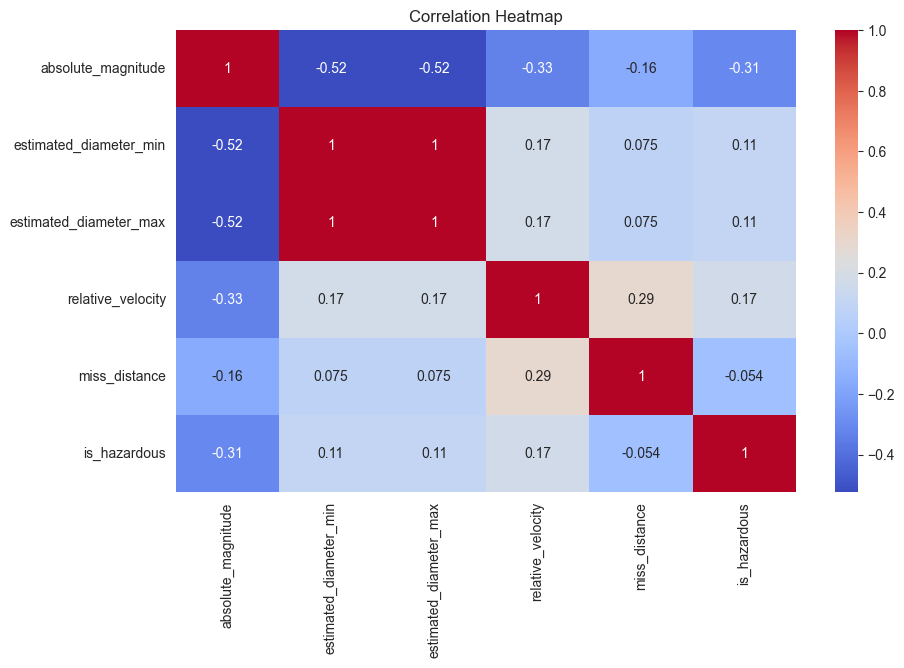

In [4]:
plt.figure(figsize=(10, 6))
corr = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                   'relative_velocity', 'miss_distance', 'is_hazardous']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Creating histograms

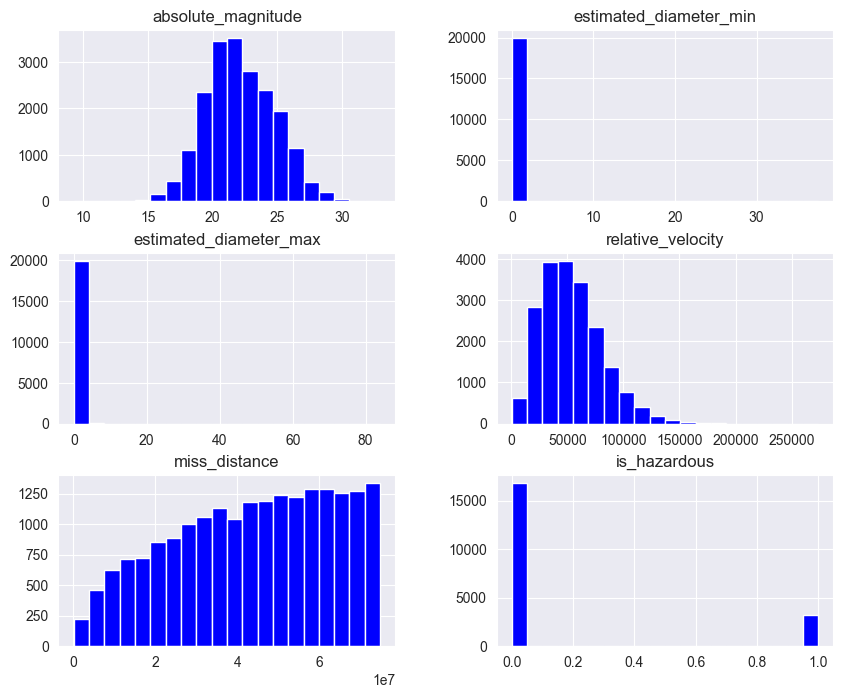

In [5]:
df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                   'relative_velocity', 'miss_distance', 'is_hazardous']].hist(bins=20, figsize=(10, 8), color='blue')
plt.show()

Creating boxplots

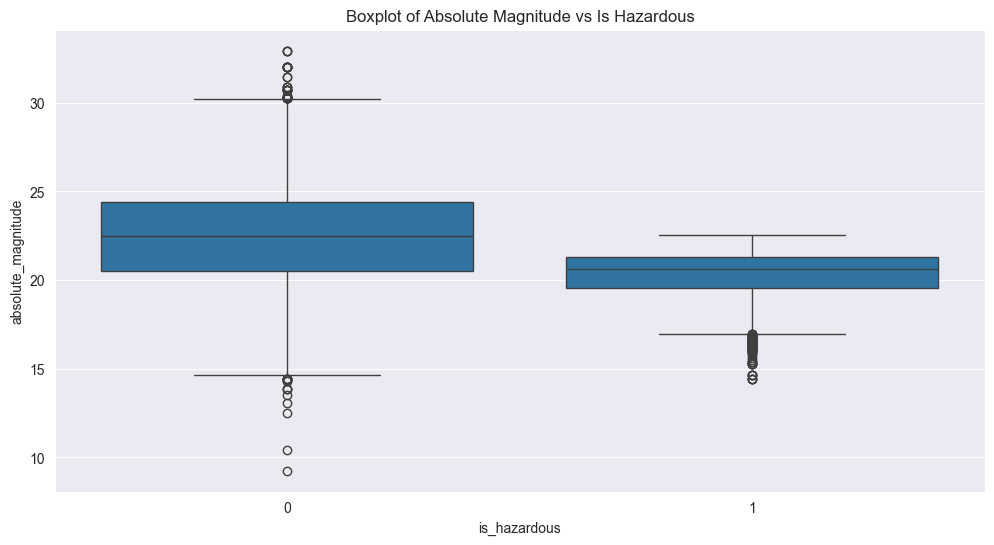

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_hazardous', y='absolute_magnitude', data=df)
plt.title('Boxplot of Absolute Magnitude vs Is Hazardous')
plt.show()

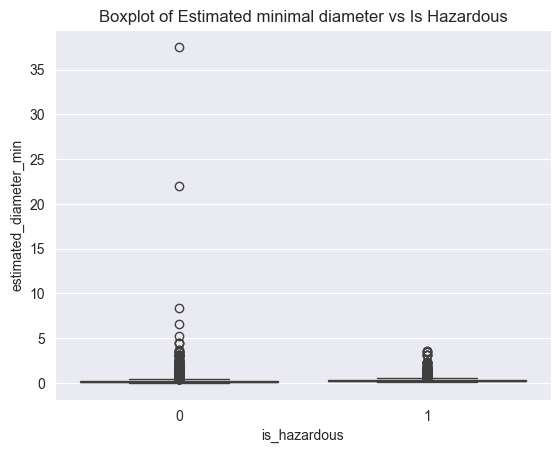

In [7]:
sns.boxplot(x='is_hazardous', y='estimated_diameter_min', data=df)
plt.title('Boxplot of Estimated minimal diameter vs Is Hazardous')
plt.show()

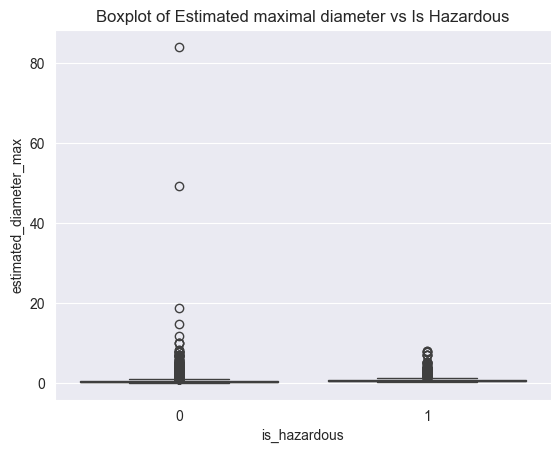

In [8]:
sns.boxplot(x='is_hazardous', y='estimated_diameter_max', data=df)
plt.title('Boxplot of Estimated maximal diameter vs Is Hazardous')
plt.show()

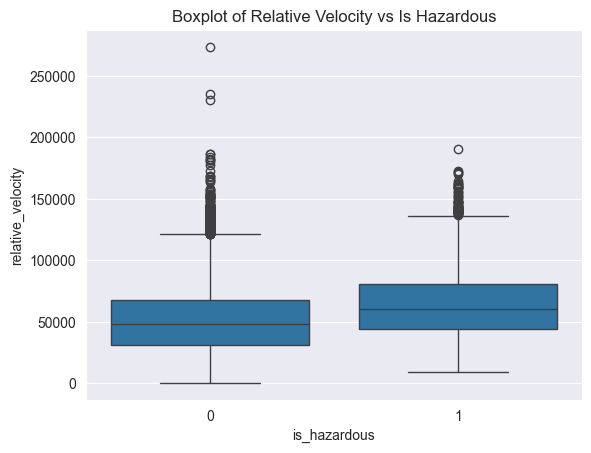

In [9]:
sns.boxplot(x='is_hazardous', y='relative_velocity', data=df)
plt.title('Boxplot of Relative Velocity vs Is Hazardous')
plt.show()

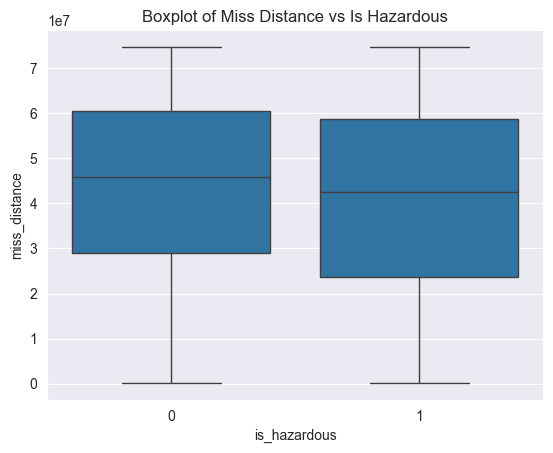

In [10]:
sns.boxplot(x='is_hazardous', y='miss_distance', data=df)
plt.title('Boxplot of Miss Distance vs Is Hazardous')
plt.show()

Data Normalisation

In [11]:
numeric_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                   'relative_velocity', 'miss_distance']

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),-1.127153,0.463380,0.463380,Earth,0.661553,0.743584,0
1,2349507,349507 (2008 QY),-1.367540,0.783214,0.783214,Earth,2.065347,0.624008,1
2,2455415,455415 (2003 GA),-0.259504,-0.147667,-0.147667,Earth,-1.061019,1.206213,0
3,3132126,(2002 PB),-0.567501,0.000096,0.000096,Earth,0.924079,-0.672756,0
4,3557844,(2011 DW),0.210002,-0.288616,-0.288616,Earth,0.084340,0.997530,0


Data splitting

In [12]:
X = df[numeric_columns]
y = df['is_hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN main body launch

In [13]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree main body launch

In [14]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier()

SVM main body launch

In [15]:
svm = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(gamma=1.0)

Random Forest main body launch

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

AdaBoost main body launch

In [17]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

C:\Users\Maks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

Printing results

In [18]:
models = [("kNN", knn), ("Decision Tree", dt), ("SVM", svm), ("Random Forest", rf), ("AdaBoost", ada)]

for name, model in models:
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))


Model: kNN
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3351
           1       0.48      0.30      0.37       649

    accuracy                           0.83      4000
   macro avg       0.67      0.62      0.64      4000
weighted avg       0.81      0.83      0.82      4000

Confusion Matrix:
[[3134  217]
 [ 452  197]]
0.83275

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3351
           1       0.44      0.45      0.45       649

    accuracy                           0.82      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.82      0.82      0.82      4000

Confusion Matrix:
[[2982  369]
 [ 354  295]]
0.81925

Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3351
           1    

Finding best amount of neighbors for KNN

In [19]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

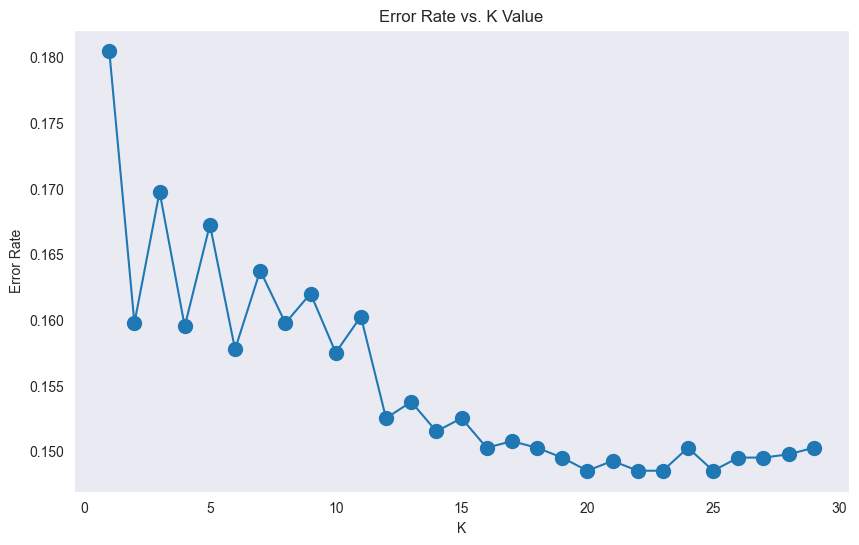

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Finding best parameters for SVM 

In [21]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True)
grid_svm.fit(X_train, y_train)

print(f"Best parameters for SVM: {grid_svm.best_params_}")
print(f"Best estimator for SVM: {grid_svm.best_estimator_}")

Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best estimator for SVM: SVC(C=10, gamma=1)


Showing best models

In [22]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[3269   82]
 [ 516  133]]

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3351
           1       0.62      0.20      0.31       649

    accuracy                           0.85      4000
   macro avg       0.74      0.59      0.61      4000
weighted avg       0.82      0.85      0.82      4000



In [23]:
grid_predictions = grid_svm.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[3290   61]
 [ 546  103]]

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3351
           1       0.63      0.16      0.25       649

    accuracy                           0.85      4000
   macro avg       0.74      0.57      0.58      4000
weighted avg       0.82      0.85      0.81      4000

